<a href="https://colab.research.google.com/github/nurfnick/psychic-guide/blob/main/Solvingw*.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

u,a,b = symbols('u,a,b')

sol = solve(E**(-u)-a+b*u, u)

In [2]:
sol

[a/b + LambertW(-exp(-a/b)/b)]

In [3]:
N(sol[0].subs(a,0).subs(b,1))

-0.318131505204764 + 1.33723570143069*I

In [5]:
def f(u,a,b):
  return a -b*u-np.exp(-u)

f(0,1,1)

0.0

In [6]:
g = a/b + LambertW(-E**(-a/b)/b,-1)
g

a/b + LambertW(-exp(-a/b)/b, -1)

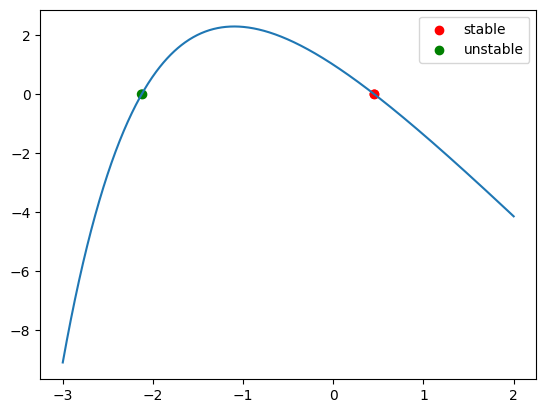

In [12]:


x = np.linspace(-3,2,1000)
y = f(x,2,3)

u = N(sol[0].subs(a,2).subs(b,3))
u2 = N(g.subs(a,2).subs(b,3))

plt.plot(x,y)
plt.scatter(u,0,c = 'r',label = "stable")
plt.scatter(u2,0,c = 'g', label = "unstable")
plt.scatter([u,u2],[0,0], c = ['r','g'])
plt.legend()
plt.show()

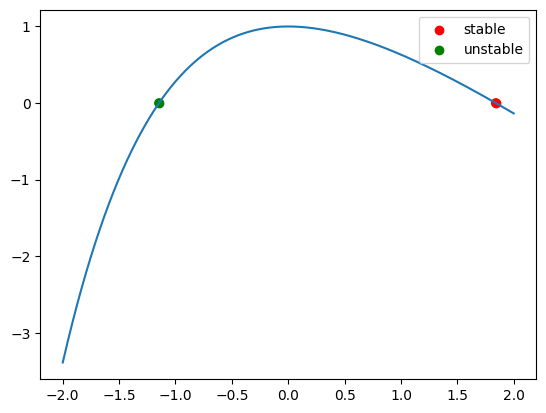

In [26]:
a0 = 2
b0 = 1

x = np.linspace(-2,2,1000)
y = f(x,a0,b0)

u = N(sol[0].subs(a,a0).subs(b,b0))
u2 = N(g.subs(a,a0).subs(b,b0))

plt.plot(x,y)
plt.scatter(u,0,c = 'r',label = "stable")
plt.scatter(u2,0,c = 'g', label = "unstable")
plt.scatter([u,u2],[0,0], c = ['r','g'])
plt.legend()
plt.show()

In [ ]:

N(sol[0].subs(a,2).subs(b,3))

0.455233355585190

In [ ]:
sol

[a/b + LambertW(-exp(-a/b)/b)]

In [ ]:
N(f.subs(a,2).subs(b,3))

-2.12539119881113

How do we find the bifurcation point?

In [ ]:
from sympy import Symbol, solve, LambertW

x = Symbol('x')

try:
    solve(LambertW(x, 0) - LambertW(x, -1), x)
except:
    pass

This didn't work.  The branches are not defined on the same set.  I looked to the wikepeida page and saw that the branch cut happens at $\frac{-1}{e}$.

In [ ]:
N(LambertW(-1/E,0)-LambertW(-1/E,-1))

0

In [ ]:
N(LambertW(-1/E,-1))

-1.00000000000000

In [ ]:
solve(-E**(-a/b)/b+1,a)

[b*log(1/b)]

The above is the value for $a$ (int terms of $b$) in which the bifurcation occurs

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [10]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.3 MB/s eta 0:00:00


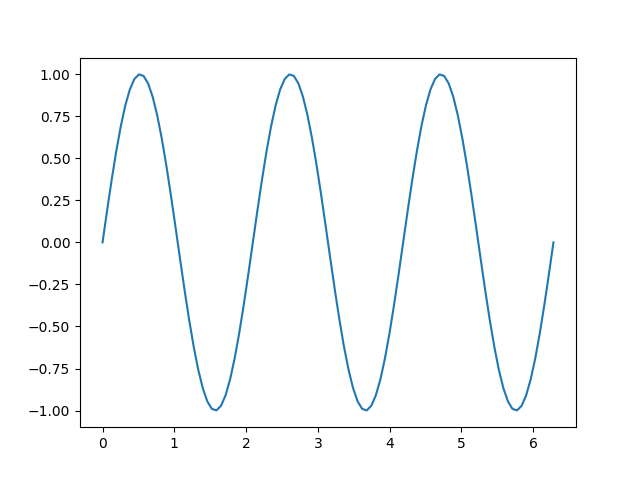

In [11]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

In [12]:
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…